In [8]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
import pandas as pd
import trimesh
import random
import sys

sys.path.append(str(Path("..").resolve()))
from src import *

# Regenerate the UV Maps

##### ℹ️ This notebook requires some ShapeNetCore samples in the `dataset/shapenet/objects` folder. It also requires the `statistics.parquet`.

The dataset generated so far is quite poor. The UV maps often lack the interesting patterns needed to guide the diffusion process with ControlNet. This is expecially true for ShapeNetCore samples.

In this notebook we ask if we can regenerate the UV Maps using Blender _Smart UV Project_ function, while preserving the effective texture mapping.

## ShapeNetCore

In [2]:
dataset = ShapeNetCoreDataset3D()
stats = dataset.statistics
uids = stats[(stats["valid"])].index

In [16]:
UID = uids[random.randint(0, len(uids) - 1)]
UID = "374fe2584abb594da094848ea4d06501"
print(UID)
obj = dataset[UID]
trimesh.load(obj.path).show()

374fe2584abb594da094848ea4d06501
Info: Removed 712 vertices


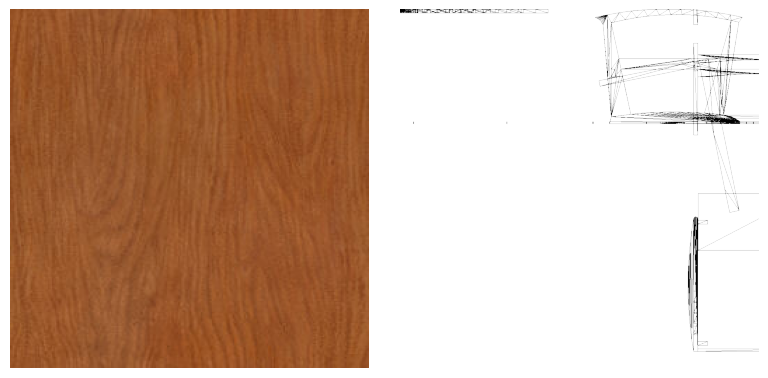

In [17]:
tex, uv = obj.textures[0], obj.draw_uv_map()
plot_images([tex, uv], cols=2, size=4)

Fra:1 Mem:32.21M (Peak 385.67M) | Time:485567:06:59.08 | Mem:0.00M, Peak:0.00M | Scene | Synchronizing object | material_0_1_8
Fra:1 Mem:32.34M (Peak 385.67M) | Time:485567:06:59.08 | Mem:0.00M, Peak:0.00M | Scene | Initializing
Fra:1 Mem:32.34M (Peak 385.67M) | Time:485567:06:59.08 | Mem:0.00M, Peak:0.00M | Scene | Updating Images | Loading BakedTexture.005
Fra:1 Mem:33.34M (Peak 385.67M) | Time:485567:06:59.08 | Mem:0.00M, Peak:0.00M | Scene | Updating Images | Loading Image_0
Fra:1 Mem:33.34M (Peak 385.67M) | Time:485567:06:59.08 | Mem:0.00M, Peak:0.00M | Scene | Updating Images | Loading BakedTexture
Fra:1 Mem:34.59M (Peak 385.67M) | Time:485567:06:59.08 | Mem:0.00M, Peak:0.00M | Scene | Updating Images | Loading BakedTexture.001
Fra:1 Mem:35.59M (Peak 385.67M) | Time:485567:06:59.08 | Mem:0.00M, Peak:0.00M | Scene | Updating Images | Loading BakedTexture.002
Fra:1 Mem:36.60M (Peak 385.67M) | Time:485567:06:59.08 | Mem:0.25M, Peak:0.25M | Scene | Updating Images | Loading BakedText

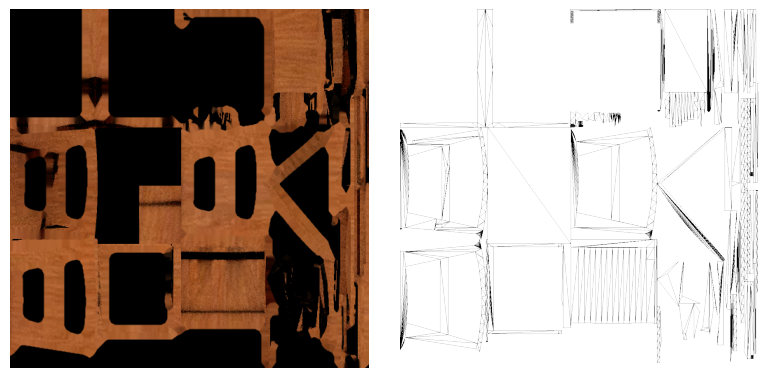

In [23]:
new_tex, new_uv = obj.regenerate_uv_map(bake_type="GLOSSY", samples=8)
plot_images([new_tex, new_uv], cols=2, size=4)

In [ ]:
renderings = obj.render(views=4)

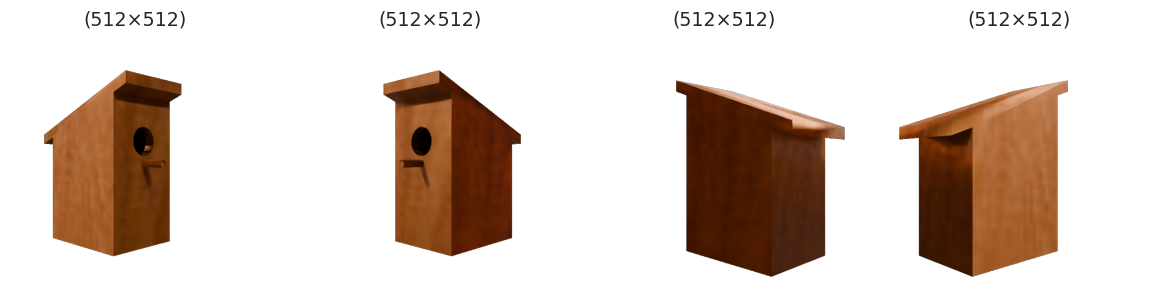

In [9]:
plot_images(renderings,size=3)

## Objaverse

In [2]:
dataset = ObjaverseDataset3D()
stats = dataset.statistics
uids = stats[(stats["valid"])].index

In [3]:
UID = uids[random.randint(0, len(uids) - 1)]
UID = "4faf118e1d4442868b9fe746cc1772f4"
obj = dataset[UID]
# trimesh.load(obj.path).show()

22:56:43 | INFO: Data are loaded, start creating Blender stuff


[05/22/25 22:56:43] INFO     Data are loaded, start creating Blender stuff

22:56:43 | INFO: Blender create Mesh node OPM0038_OPM0038_0


                    INFO     Blender create Mesh node OPM0038_OPM0038_0

22:56:43 | INFO: glTF import finished in 0.03s


                    INFO     glTF import finished in 0.03s

In [4]:
obj.export(Path('./scene.blend').resolve())

Info: Saved "scene.blend"


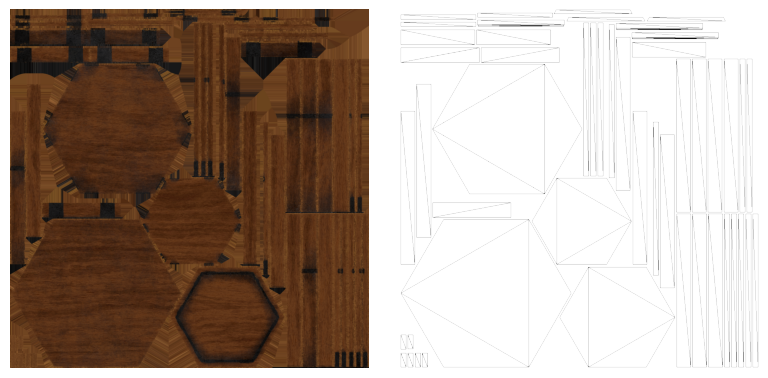

In [21]:
tex, uv = obj.textures[0], obj.draw_uv_map()
plot_images([tex, uv], cols=2, size=4)

Fra:1 Mem:36.86M (Peak 401.92M) | Time:485541:02:48.15 | Mem:0.00M, Peak:0.00M | Scene | Synchronizing object | OPM0038_OPM0038_0
Fra:1 Mem:36.91M (Peak 401.92M) | Time:485541:02:48.15 | Mem:0.00M, Peak:0.00M | Scene | Initializing
Fra:1 Mem:36.91M (Peak 401.92M) | Time:485541:02:48.15 | Mem:0.00M, Peak:0.00M | Scene | Updating Images | Loading BakedTexture.003
Fra:1 Mem:36.91M (Peak 401.92M) | Time:485541:02:48.15 | Mem:0.00M, Peak:0.00M | Scene | Updating Images | Loading Image_0
Fra:1 Mem:41.91M (Peak 401.92M) | Time:485541:02:48.15 | Mem:0.00M, Peak:0.00M | Scene | Updating Images | Loading BakedTexture
Fra:1 Mem:42.91M (Peak 401.92M) | Time:485541:02:48.15 | Mem:0.00M, Peak:0.00M | Scene | Updating Images | Loading BakedTexture.001
Info: Baking map saved to internal image, save it externally or pack it


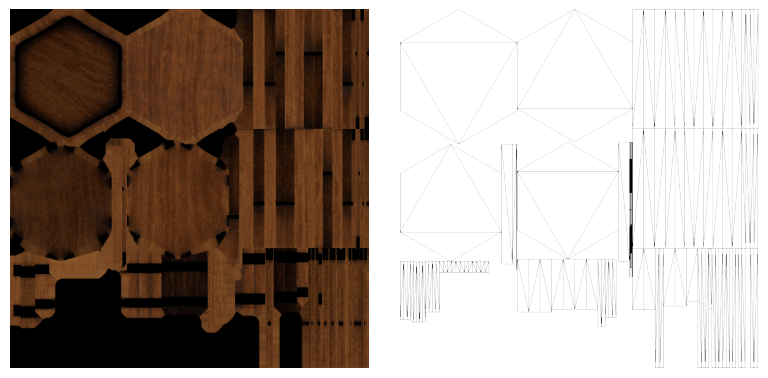

In [8]:
new_tex, new_uv = obj.regenerate_uv_map(samples=16)
plot_images([new_tex, new_uv], cols=2, size=4)

In [9]:
renderings = obj.render(views=4)

  0%|          | 0/4 [00:00<?, ?it/s]

Fra:1 Mem:23.94M (Peak 23.94M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | OPM0038_OPM0038_0
Fra:1 Mem:23.98M (Peak 23.98M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Initializing
Fra:1 Mem:23.98M (Peak 23.98M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Images | Loading BakedTexture.003
Fra:1 Mem:24.98M (Peak 24.98M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Images | Loading BakedTexture.002
Fra:1 Mem:25.98M (Peak 25.98M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Images | Loading BakedTexture.001
Fra:1 Mem:39.73M (Peak 44.00M) | Time:00:00.03 | Mem:16.00M, Peak:16.00M | Scene, ViewLayer | Waiting for render to start
Fra:1 Mem:39.73M (Peak 44.00M) | Time:00:00.03 | Mem:16.00M, Peak:16.00M | Scene, ViewLayer | Loading render kernels (may take a few minutes the first time)
Fra:1 Mem:39.73M (Peak 44.00M) | Time:00:00.03 | Mem:16.00M, Peak:16.00M | Sce

 25%|██▌       | 1/4 [00:02<00:07,  2.34s/it]

Fra:1 Mem:256.17M (Peak 517.76M) | Time:00:02.21 | Mem:223.19M, Peak:364.16M | Scene, ViewLayer | Sample 1/1
Fra:1 Mem:256.17M (Peak 517.76M) | Time:00:02.21 | Mem:223.19M, Peak:364.16M | Scene, ViewLayer | Finished
Saved: '/scratch_local/tmps0x813p2.png'
Time: 00:02.32 (Saving: 00:00.09)

Fra:1 Mem:23.94M (Peak 23.94M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | OPM0038_OPM0038_0
Fra:1 Mem:23.98M (Peak 23.98M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Initializing
Fra:1 Mem:23.98M (Peak 23.98M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Images | Loading Image_0
Fra:1 Mem:27.98M (Peak 27.98M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Images | Loading BakedTexture.002
Fra:1 Mem:39.73M (Peak 44.00M) | Time:00:00.03 | Mem:16.00M, Peak:16.00M | Scene, ViewLayer | Waiting for render to start
Fra:1 Mem:39.73M (Peak 44.00M) | Time:00:00.03 | Mem:16.00M, Peak:16.00M | Scene, ViewLa

 50%|█████     | 2/4 [00:04<00:04,  2.20s/it]

Fra:1 Mem:256.17M (Peak 517.76M) | Time:00:01.97 | Mem:223.19M, Peak:364.16M | Scene, ViewLayer | Sample 1/1
Fra:1 Mem:256.17M (Peak 517.76M) | Time:00:01.97 | Mem:223.19M, Peak:364.16M | Scene, ViewLayer | Finished
Saved: '/scratch_local/tmps2r5gptq.png'
Time: 00:02.08 (Saving: 00:00.02)

Fra:1 Mem:23.94M (Peak 23.94M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | OPM0038_OPM0038_0
Fra:1 Mem:23.98M (Peak 23.98M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Initializing
Fra:1 Mem:23.98M (Peak 23.98M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Images | Loading Image_0
Fra:1 Mem:27.98M (Peak 27.98M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Images | Loading BakedTexture.002
Fra:1 Mem:39.73M (Peak 44.00M) | Time:00:00.07 | Mem:16.00M, Peak:16.00M | Scene, ViewLayer | Waiting for render to start
Fra:1 Mem:39.73M (Peak 44.00M) | Time:00:00.07 | Mem:16.00M, Peak:16.00M | Scene, ViewLa

 75%|███████▌  | 3/4 [00:06<00:02,  2.17s/it]

Fra:1 Mem:256.17M (Peak 517.76M) | Time:00:02.07 | Mem:223.19M, Peak:364.16M | Scene, ViewLayer | Sample 1/1
Fra:1 Mem:256.17M (Peak 517.76M) | Time:00:02.07 | Mem:223.19M, Peak:364.16M | Scene, ViewLayer | Finished
Saved: '/scratch_local/tmpd4t2nvey.png'
Time: 00:02.12 (Saving: 00:00.02)

Fra:1 Mem:23.94M (Peak 23.94M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | OPM0038_OPM0038_0
Fra:1 Mem:23.98M (Peak 23.98M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Initializing
Fra:1 Mem:23.98M (Peak 23.98M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Images | Loading BakedTexture.003
Fra:1 Mem:24.98M (Peak 24.98M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Images | Loading BakedTexture
Fra:1 Mem:24.98M (Peak 25.98M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Images | Loading BakedTexture.002
Fra:1 Mem:39.73M (Peak 44.00M) | Time:00:00.04 | Mem:16.00M, Peak:16.0

100%|██████████| 4/4 [00:08<00:00,  2.22s/it]

Fra:1 Mem:256.17M (Peak 517.76M) | Time:00:02.24 | Mem:223.19M, Peak:364.16M | Scene, ViewLayer | Sample 1/1
Fra:1 Mem:256.17M (Peak 517.76M) | Time:00:02.24 | Mem:223.19M, Peak:364.16M | Scene, ViewLayer | Finished
Saved: '/scratch_local/tmp3eipt92e.png'
Time: 00:02.28 (Saving: 00:00.02)



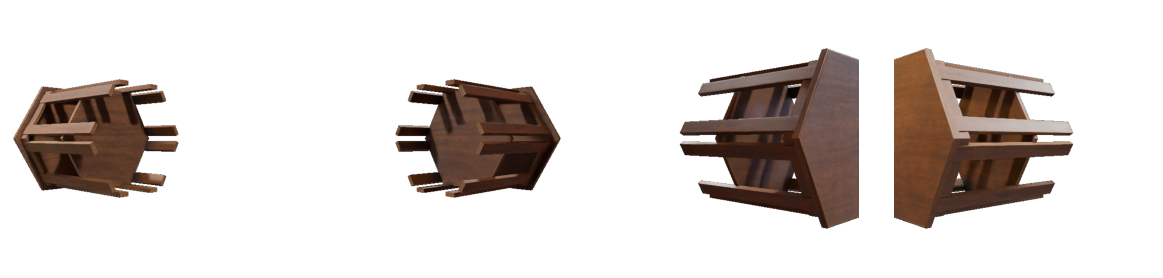

In [10]:
plot_images(renderings, size=3)